# **House Price Prediction**

**Installing Required Libraries**


In [26]:
!pip install pandas numpy scikit-learn matplotlib seaborn


**Loading and Exploring the Dataset**

In [27]:
import pandas as pd

# Load dataset
data = pd.read_csv("/train.csv")

# Explore data
display(data.head())
display(data.info())
display(data.isnull().sum())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


**Selecting Features**

In [28]:
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = data['SalePrice']


**Splitting Data into Training and Testing Sets**

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Training Linear Regression Model**

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**Evaluating the Model**

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 2806426667.247853
R² Score: 0.6341189942328371


**Making Predictions**

In [32]:
import pandas as pd

# Predict price for a new house
new_house = pd.DataFrame([[2500, 3, 2]],
                         columns=['GrLivArea','BedroomAbvGr','FullBath'])

predicted_price = model.predict(new_house)

print(f"Predicted House Price: {predicted_price[0]:.2f}")



Predicted House Price: 292390.67


**Plotting: Actual vs Predicted Prices (Scatter Plot)**

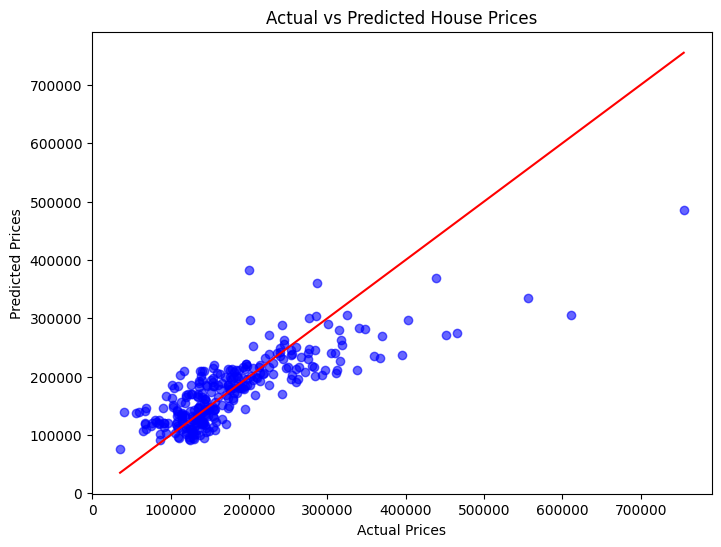

Mean Squared Error: 2806426667.247853
R² Score: 0.6341189942328371


In [33]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)   # predicted values

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")  # reference line
plt.show()
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")